## Analyze A/B Test Results

Bashayer Alshehri (6 June, 2020)

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these.

For this project, I worked to understand the results of an A/B test run by an e-commerce website. The goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

This project was completed as part of Udacity's Data Analyst Nanodegree certification.


<a id='probability'></a>
#### Part I - Probability


In [1]:
#Import libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Read in the `ab_data.csv` data. Store it in `df`.

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')

In [3]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [4]:
print('The Number of rows in the dataset =', df.shape[0])

The Number of rows in the dataset = 294478


c. The number of unique users in the dataset.

In [5]:
print('The Number of unique users in the dataset =',df['user_id'].nunique())

The Number of unique users in the dataset = 290584


d. The proportion of users converted.

In [6]:
#check for duplication 
df.duplicated().sum()

0

#### No duplicate records.

In [7]:
converted = (df[df['converted']== 1].count()/df['user_id'].count())['user_id']*100
print('The proportion of users converted = ',converted)

The proportion of users converted =  11.96591935560551


e. The number of times the `new_page` and `treatment` don't match.

In [8]:
G1 = (df[(df['landing_page'] == 'new_page') & (df['group'] != 'treatment')].count())['group']
print(G1)

1928


In [9]:
G2 = (df[(df['landing_page'] == 'old_page') & (df['group'] == 'treatment')].count())['group']
print(G2)

1965


In [10]:
group = G1 + G2

In [11]:
print("The number of times the new_page and treatment don't match = ",group)

The number of times the new_page and treatment don't match =  3893


f. Do any of the rows have missing values?

In [12]:
df.isnull().count()

user_id         294478
timestamp       294478
group           294478
landing_page    294478
converted       294478
dtype: int64

####  No Missing Value ...

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page. 
Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [13]:
#copy df
df2 = df

In [14]:
df2 = df[((df.group=='treatment') & (df.landing_page=='new_page')) | ((df.group=='control') & (df.landing_page=='old_page'))]

In [15]:
#check 
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [16]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [17]:
User_ids = df2['user_id'].nunique()
print('The number of unique user_ids = ',User_ids)

The number of unique user_ids =  290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [18]:
repeated = df2[df2['user_id'].duplicated()]['user_id']
print('The repeated user_id in row number = ',repeated.index[0] ,' with user_id = ',repeated.values[0])

The repeated user_id in row number =  2893  with user_id =  773192


c. What is the row information for the repeat **user_id**? 

In [19]:
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [20]:
df2 = df2.drop_duplicates(['user_id'], keep='first')

In [21]:
sum(df2.duplicated())

0

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [22]:
converted = df2['converted'].mean()
print('The probability of an individual converting regardless of the page they receive  = ',converted)

The probability of an individual converting regardless of the page they receive  =  0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [23]:
control_converted = df2[df2['group'] == 'control']['converted'].mean()
print('The number of the individual in the control and they converted  = ',control_converted)

The number of the individual in the control and they converted  =  0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [24]:
treatment_converted = df2[df2['group'] == 'treatment']['converted'].mean()
print('The number of the individual in the treatment and they converted  = ',treatment_converted)

The number of the individual in the treatment and they converted  =  0.11880806551510564


In [25]:
obs_diff = treatment_converted - control_converted
obs_diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [26]:
new_page = (df2['landing_page']=='new_page').mean()
print('The probability that an individual received the new page  = ',new_page)

The probability that an individual received the new page  =  0.5000619442226688


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

- The probability that the individual in the control converted  =  0.1203863045004612
- The probability probability the individual in the treatment converted  =  0.11880806551510564

##### According to this, indicates that the new landing page is not leading to any improvement in terms of conversion rate,

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

  $$H_.Null: p_{new} - p_{old} >= 0$$
 $$H_.alternative: p_{new} - p_{old} < 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [27]:
P_new = df2['converted'].mean()
print('The conversion rate for P𝑛𝑒𝑤 under the null = ',P_new)

The conversion rate for P𝑛𝑒𝑤 under the null =  0.11959708724499628


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [28]:
P_old = df2['converted'].mean()
print('The conversion rate for P𝑜𝑙𝑑  under the null = ',P_old)

The conversion rate for P𝑜𝑙𝑑  under the null =  0.11959708724499628


c. What is $n_{new}$, the number of individuals in the treatment group?

In [29]:
n_new = df2[df2['group'] == 'treatment'].shape[0]
print('The number of individuals in the treatment group = ',n_new)

The number of individuals in the treatment group =  145310


d. What is $n_{old}$, the number of individuals in the control group?

In [30]:
n_old = df2[df2['group'] == 'control'].shape[0]
print('The number of individuals in the control group = ',n_old)

The number of individuals in the control group =  145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [31]:
# Simulate n_new transactions with a convert rate of p_new under the null
new_page_converted = np.random.choice([0, 1], n_new, p = [P_new, 1-P_new])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [32]:
# Simulate n_old transactions with a convert rate of p_old under the null
old_page_converted = np.random.choice([0, 1], n_old, p = [P_old, 1-P_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [33]:
#diffrence between Pnew and Pold
diff = new_page_converted.mean() - old_page_converted.mean()

print(diff)

-0.0011335482923667817


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [34]:
#Create 10,000  𝑝𝑛𝑒𝑤  -  𝑝𝑜𝑙𝑑  values using the same simulation process
p_diffs = []
for p in range(10000):
    new_page_converted = np.random.choice([0, 1], size = n_new, p = [P_new, 1 - P_new])
    old_page_converted = np.random.choice([0, 1], size = n_old, p = [P_old, 1 - P_old])
    diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diff)
    
p_diffs[:5]

[0.0003187089964821199,
 -0.0003554860995055309,
 -0.00047272293312417,
 0.0016539971951009536,
 0.00014668349026147887]

In [35]:
#Store all 10,000 values in a NumPy array
p_diffs = np.asarray(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

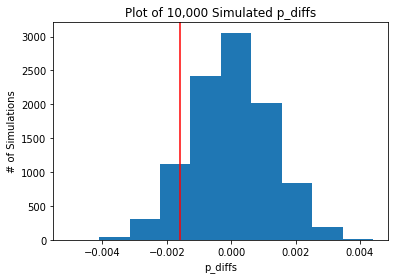

In [36]:
#histogram of p_diffs
plt.hist(p_diffs)
plt.ylabel('# of Simulations')
plt.xlabel('p_diffs')
plt.title('Plot of 10,000 Simulated p_diffs');
plt.axvline(x=obs_diff, color='r');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [37]:
proportion = (p_diffs > obs_diff).mean()
print('The proportion of the p_diffs are greater than the actual difference = ',proportion)

The proportion of the p_diffs are greater than the actual difference =  0.9053


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

- This indicates to the p-value, which was calculated in j. A small p-value (< 0.05) would suggest rejecting the null-hypothesis., and more than this we would be failed to reject the null-hypothesis, regarding this there is no statistical evidence to reject the null hypothesis since our p-value = (0.9053)

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [38]:
import statsmodels.api as sm

convert_old = df2.query(" landing_page == 'old_page' and converted == 1").shape[0]
convert_new = df2.query(" landing_page == 'new_page' and converted == 1").shape[0]
n_old = df2.query('landing_page== "old_page"').shape[0]
n_new = df2.query('landing_page== "new_page"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [39]:
#Computing z_score and p_value
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)

1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [40]:
from scipy.stats import norm
norm.cdf(z_score)

0.9050583127590245

In [41]:
norm.ppf(1-(0.05)) 

1.6448536269514722

- Since the z-score of 1.3109241984234394 does not exceed the critical value of 1.6448536269514722, we can say that we fail to reject null hypothesis. Therefore, the converted rate for new page and old page have no difference. The p_value does not match as parts j and k .

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

#### Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [42]:
#intercept column
df2['intercept'] = 1

#Create dummy variable column
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [43]:
import statsmodels.api as sm

Model=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results=Model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [44]:
#summary of the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 21 Jun 2020   Pseudo R-squ.:               8.077e-06
Time:                        10:22:41   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

In Part || : 
I assume that the old page is better unless the new page proves it's better , and compared to c-e questions, they have  different explanatory factors for the result.
The p-value associated with ab_page is 0.190.

- The null hypothesis in the c-e part is =  there is no difference between the "treatment" and "control" group.
- An alternative hypothesis is =  that there is a difference between the "treatment" and "control" groups.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

- We should add additional factors to the regression models, but there some disadvantages in this situation like we don't know that our additional factor will influence the result in which direction.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [45]:
# Store Countries.csv data in dataframe
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [46]:
#join the df2 dataset with country dataset
df3  = df2.merge(countries, on ='user_id', how='left')
df3 .head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [47]:
# Names of countries
countries['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [48]:
#get dummy variables with 'CA' as the baseline
df3[['CA','US', 'UK']] = pd.get_dummies(df3['country'])[['CA','US', "UK"]]
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,US,UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1,0


In [49]:
#Create intercept variable
df3['intercept'] = 1

#Create Logit regression model for conveted and country, and us CA as baseline
Model_Log = sm.Logit(df3['converted'], df3[['intercept','UK','US']])
result2 = Model_Log.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [50]:
print (result2.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 21 Jun 2020   Pseudo R-squ.:               1.521e-05
Time:                        10:22:43   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.1

In [51]:
np.exp(result2.params)

intercept    0.130350
UK           1.052027
US           1.041647
dtype: float64

In [52]:
print(1/_)

intercept    7.671651
UK           0.950546
US           0.960018
dtype: float64


**Depending on the above results** 

If an individual has located on the UK page:
-  They are 0.950546 times more likely to be converted than if has located in the CA, holding all other variables constant.

If an individual has located on the US page:
- They are 0.960018 times more likely to be converted than if has located in the CA, holding all other variables constant.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion. Create the necessary additional columns, and fit the new model.

Provide the summary results, and your conclusions based on the results.

In [53]:
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,US,UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1,0


In [54]:
#New intereacton variable between new page and country US and UK
df3['UK_new_page'] = df3['ab_page']* df3['UK']
df3['US_new_page'] = df3['ab_page']* df3['US']

In [55]:
#logistic regression for the intereaction variable between new page and country using dummy variable
Logit2 = sm.Logit(df3['converted'], df3[['intercept','ab_page','UK_new_page','US_new_page','UK','US']])
result3 = Logit2.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [56]:
print(result3.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 21 Jun 2020   Pseudo R-squ.:               3.482e-05
Time:                        10:22:46   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page        -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK_new_page     0.0783      0.057      1.378    

In [57]:
np.exp(result3.params)

intercept      0.134794
ab_page        0.934776
UK_new_page    1.081428
US_new_page    1.048001
UK             1.011854
US             1.017682
dtype: float64

In [58]:
1/_

intercept      7.418713
ab_page        1.069775
UK_new_page    0.924703
US_new_page    0.954198
UK             0.988285
US             0.982625
dtype: float64

From the above Results: 

- The coefficient of interaction variable "UK_new_page" and "US_new_page" are different from the coefficient of the new_page.

- Only the intercept's p-value < 0.05, which is statistically significant enough for the converted rate.

- Other variables in the summary are not statistically significant. 

- Therefore, the country factor is not significant on the converted rate considering the type of the page either is old or new.

## Conclusion:


None of the variables have significant p-values. Therefore, we will fail to reject the null and conclude that there is not sufficient evidence to suggest that there is an interaction between country and page received that will predict whether a user converts or not.

In [59]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0

### Resources 

- https://stackoverflow.com/
- Data Analysis Udacity Course